In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent=dataset[['age','bmi','children','sex_male','smoker_yes']]

In [8]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [9]:
dependent=dataset[['charges']]

In [10]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [13]:
x_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28.215,0,0,0
196,39,32.800,0,0,0
438,52,46.750,5,0,0
183,44,26.410,0,0,0
1298,33,27.455,2,1,0
...,...,...,...,...,...
763,27,26.030,0,1,0
835,42,35.970,2,1,0
1216,40,25.080,0,1,0
559,19,35.530,0,1,0


In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [15]:
x_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [50]:
from sklearn.ensemble import AdaBoostRegressor
regressor=AdaBoostRegressor(random_state=0,n_estimators=1,learning_rate=1.0,loss='linear')
regressor=regressor.fit(x_train, y_train)

C:\Users\pavih\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
y_pred=regressor.predict(x_test)

In [52]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [53]:
r_score

0.8809576998632572

NameError: name 'n_estimators' is not defined

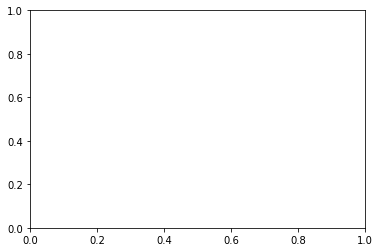

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, "k-", label="Decision Stump Error")
ax.plot([1, n_estimators], [dt_err] * 2, "k--", label="Decision Tree Error")

colors = sns.color_palette("colorblind")

ax.plot(
    np.arange(n_estimators) + 1,
    ada_discrete_err,
    label="Discrete AdaBoost Test Error",
    color=colors[0],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_discrete_err_train,
    label="Discrete AdaBoost Train Error",
    color=colors[1],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err,
    label="Real AdaBoost Test Error",
    color=colors[2],
)
ax.plot(
    np.arange(n_estimators) + 1,
    ada_real_err_train,
    label="Real AdaBoost Train Error",
    color=colors[4],
)

ax.set_ylim((0.0, 0.5))
ax.set_xlabel("Number of weak learners")
ax.set_ylabel("error rate")

leg = ax.legend(loc="upper right", fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

In [36]:
#Save model create file in deployment using import pickle called the file saved in .sav
import pickle
filename="finalized_model_insurance-Adaboost.sav"

In [98]:
#Its a dummy data file and the file is write binary dataset in regressor open the file variable
pickle.dump(regressor,open(filename,'wb'))

In [99]:
#once loaded and check the model
loaded_model=pickle.load(open("finalized_model_insurance-Adaboost.sav",'rb'))

In [100]:
result=loaded_model.predict([[16723.5,17823.5,1555,0,1]])

In [101]:
result

array([47865.29543781])